In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [56]:
tickets = pd.read_csv('anonymized_hubspot_tickets.csv')
deals = pd.read_csv('anonymized_hubspot_deals.csv')
companies = pd.read_csv('anonymized_hubspot_companies.csv')

C:\Users\zhaos\AppData\Local\Temp\ipykernel_12000\2095908849.py:3: DtypeWarning: Columns (24,25,28,32,45) have mixed types. Specify dtype option on import or set low_memory=False.
  companies = pd.read_csv('anonymized_hubspot_companies.csv')


In [57]:
len(deals)

593

In [58]:
len(companies)

19851

In [59]:
len(tickets)

79

In [60]:
pd.set_option('display.max_columns', None)
tickets.head(n = 2)

,Create date,Ticket Tags,Stage Date - Project Launch,Associated Contact,Category,Target Launch Date,Kickoff Call,Close date,Pipeline,Stage Date - Project Initiation,Stage Date - Planning Phase,Ticket status,Stage Date - Execution,Time to first agent email reply (HH:mm:ss),Last CES survey rating,Priority,Associated Company,Who will be creating the Syms?,Stage Date - Closure Phase,Stage Date - Monitoring and Control Phase,Associated Company (Primary),Response time (HH:mm:ss),Ticket ID,Time to close (HH:mm:ss),Associated Deal,Library index approved,Training: General Overview,Latest Milestone,Training: Deployment/User Management Training,Requirements for the Trial,Training: Sym Building 101,Last modified date,Type,Trial End Date,Training: Sym Building 201,Stage Date - Converted Won,Latest Milestone Update Date,Ticket name,Trial Overview,Trial Start Date,1st Syms presented for review,Project Launch Day,Training: Reporting,Construction of 1st Sym begun,Trial Required,Was the sym QAed?
0,2023-12-18 15:02,NaN,NaN,Contact_b6d930b5,NaN,NaN,2023-12-27,2024-01-29 11:50,Project Success Plan,2023-12-18,NaN,Converted-Won,2024-01-02,NaN,NaN,NaN,Company_67d87cec,NaN,2024-01-29,NaN,Company_67d87cec,NaN,2193923207,1004:48:10,Deal_67d87cec,No,NaN,NaN,NaN,Coaching,NaN,2025-02-14 13:39,NaN,NaN,NaN,2024-02-06,NaN,Ticket_4baf7886,NaN,NaN,NaN,NaN,NaN,2023-12-27,NaN,NaN
1,2024-10-30 12:31,NaN,NaN,Contact_aa84b2e1,NaN,NaN,NaN,2025-02-10 11:18,Project Success Plan,NaN,NaN,Lost,NaN,49:24:00,NaN,NaN,Company_7588d0d5,NaN,NaN,NaN,Company_67d87cec,49:24:00,15899166073,2471:47:33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2025-02-14 13:39,NaN,2024-11-07,NaN,NaN,NaN,Ticket_88dda9e1,NaN,2024-11-05,NaN,NaN,NaN,NaN,NaN,NaN


In [61]:
# EDA for deals

In [62]:
# 1. Drop Columns with >95% Missing Values
# Identify columns with >95% missing values
high_missing_cols = deals.columns[deals.isnull().mean() > 0.95]
print("Columns to drop (over 90% missing):")
print(high_missing_cols.tolist())

# Drop them
deals_cleaned = deals.drop(columns=high_missing_cols)

Columns to drop (over 90% missing):
['Cumulative time in "Closed Lost (Sales Pipeline)" (HH:mm:ss)', 'Annual contract value', 'Annual recurring revenue', 'Monthly recurring revenue', 'Forecast probability', 'Cumulative time in "Closed Trial (Sales Pipeline)" (HH:mm:ss)', 'Total contract value', 'Cumulative time in "Closed Won (Sales Pipeline)" (HH:mm:ss)']


Missing in 'Amount': 0.03372681281618887
count        573.000000
mean       40013.277487
std        77441.027305
min            0.000000
25%         4800.000000
50%        24000.000000
75%        50000.000000
max      1000000.000000
Name: Amount, dtype: float64


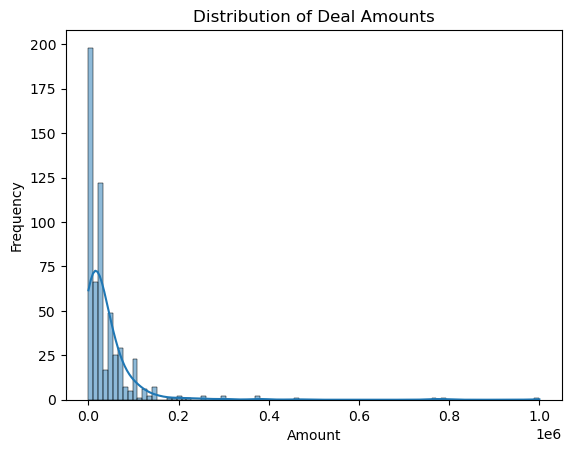

In [63]:
#2. Check and Visualize Amount Field
import matplotlib.pyplot as plt
import seaborn as sns

# Check missing % and basic stats
print("Missing in 'Amount':", deals_cleaned['Amount'].isnull().mean())
print(deals_cleaned['Amount'].describe())

# Distribution plot
sns.histplot(deals_cleaned['Amount'].dropna(), kde=True)
plt.title("Distribution of Deal Amounts")
plt.xlabel("Amount")
plt.ylabel("Frequency")
plt.show()


count     593.000000
mean      153.819562
std       134.044086
min         0.000000
25%        89.000000
50%       128.000000
75%       167.000000
max      1045.000000
Name: Days to close, dtype: float64


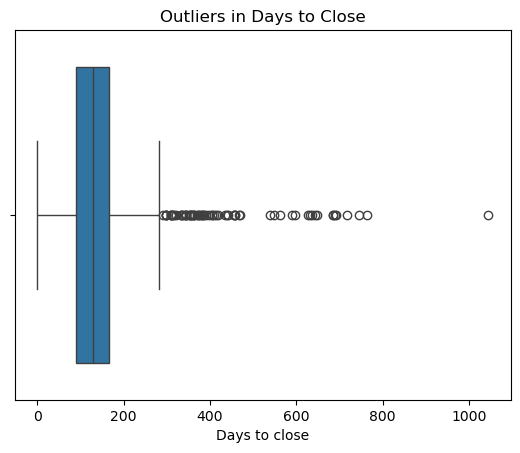

In [64]:
# 3. Check for Outliers in Days to Close
# Basic stats
print(deals_cleaned['Days to close'].describe())

# Boxplot to check for outliers
sns.boxplot(x=deals_cleaned['Days to close'])
plt.title("Outliers in Days to Close")
plt.show()


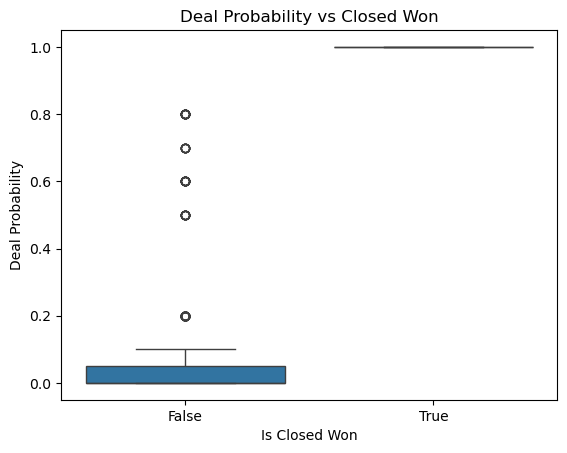

In [65]:
# 4. Explore Deal Probability vs. Outcome
# Boxplot of probability by deal outcome
sns.boxplot(x=deals_cleaned['Is Closed Won'], y=deals_cleaned['Deal probability'])
plt.title("Deal Probability vs Closed Won")
plt.xlabel("Is Closed Won")
plt.ylabel("Deal Probability")
plt.show()


In [66]:
# EDA for tickets

In [67]:
# 1. Drop columns with >95% missing
high_missing = tickets.columns[tickets.isnull().mean() > 0.95]
tickets_cleaned = tickets.drop(columns=high_missing)
print("Dropped columns:", list(high_missing))

# 2. Check time-related fields
time_fields = ['Time to close (HH:mm:ss)', 'Response time (HH:mm:ss)', 'Time to first agent email reply (HH:mm:ss)']
print(tickets_cleaned[time_fields].head())

# 3. Associated Deal analysis
print("Tickets with associated deal:", tickets_cleaned['Associated Deal'].notnull().sum())
print("Tickets without associated deal:", tickets_cleaned['Associated Deal'].isnull().sum())

# 4. Training completion overview
training_cols = [col for col in tickets.columns if "Training" in col]
training_missing = tickets[training_cols].isnull().mean() * 100
print(training_missing.sort_values(ascending=False))


Dropped columns: ['Ticket Tags', 'Category', 'Stage Date - Planning Phase', 'Last CES survey rating', 'Priority', 'Who will be creating the Syms?', 'Stage Date - Monitoring and Control Phase', 'Type', 'Trial Required', 'Was the sym QAed?']
  Time to close (HH:mm:ss) Response time (HH:mm:ss)  \
0               1004:48:10                      NaN   
1               2471:47:33                 49:24:00   
2                      NaN               1516:30:41   
3               2853:51:33                 26:25:51   
4                      NaN                 13:32:11   

  Time to first agent email reply (HH:mm:ss)  
0                                        NaN  
1                                   49:24:00  
2                                 1516:30:41  
3                                   26:25:51  
4                                   13:32:11  
Tickets with associated deal: 58
Tickets without associated deal: 21
Training: Sym Building 201                       75.949367
Training: Reporting

In [68]:
# EDA for companies

In [69]:
# 1. Drop High-Missing Columns
high_missing_cols = companies.columns[companies.isnull().mean() > 0.95]
companies_cleaned = companies.drop(columns=high_missing_cols)
print("Dropped columns:", list(high_missing_cols))

Dropped columns: ['Parent Company', 'Target Account', 'Total Agents', 'Close Date', '# of Agents Total', 'Revenue range', '# of Agents Contracted', 'Primary Company', 'Industry group', 'LMS System', 'SymTrain Use Cases', 'Associated Company', 'BPO', 'SSO Application', 'SymTrain Product', 'Contract End Date', 'SSO Implemented?', 'BPO Program', 'WFM', 'BPO Program Tier']


Industry
Computer Software                   1216
Hospital & Health Care              1197
Insurance                           1024
Banking                              901
NaN                                  774
Financial Services                   712
Professional Training & Coaching     669
Higher Education                     645
Technology                           594
Construction                         505
Name: count, dtype: int64


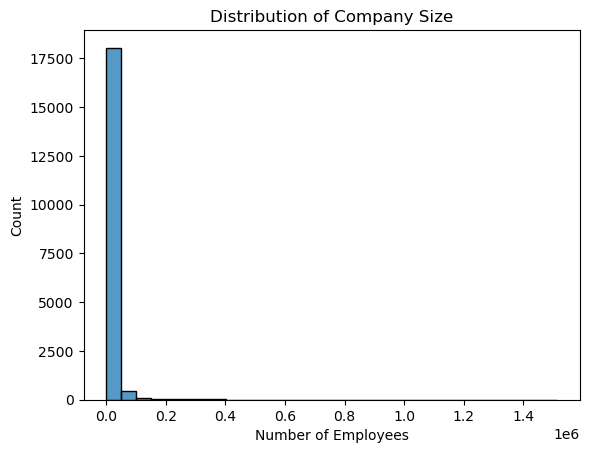

In [70]:
# 2. Explore Industry and Size
# Industry distribution
print(companies['Industry'].value_counts(dropna=False).head(10))

# Number of employees distribution
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(companies['Number of Employees'].dropna(), bins=30)
plt.title("Distribution of Company Size")
plt.xlabel("Number of Employees")
plt.show()


In [71]:
# 3. Standardize Country/Region
# Check unique values and casing
print(companies['Country/Region'].str.strip().str.lower().value_counts().head(10))

Country/Region
united states     14670
canada              927
united kingdom      470
india               382
australia           226
germany             208
france              190
japan               162
switzerland         127
singapore            87
Name: count, dtype: int64


In [72]:
# 4. Parse Web Technologies (example split by comma)
# View how web technologies look
print(companies['Web Technologies'].dropna().head())

# Convert to lists
companies['Web_Tech_List'] = companies['Web Technologies'].dropna().apply(lambda x: [tech.strip() for tech in str(x).split(',')])

0                                             Route 53
2    Youtube; App Nexus; Google Tag Manager; Facebo...
3    Postmark; Facebook Advertiser; Salesforce; Goo...
4    Microsoft Office 365; Google Tag Manager; Reca...
6    Youtube; Apache; Google Maps; Wordpress; Tawk;...
Name: Web Technologies, dtype: object


In [73]:
# 5. Explore BPO Flag Inconsistencies
print(companies['BPO'].value_counts(dropna=False))
print(companies['BPO Program'].value_counts(dropna=False))


BPO
NaN                                                                         19770
Etech                                                                          38
Startek                                                                        11
Redial                                                                          7
Arise                                                                           3
Alorica                                                                         3
Everise                                                                         3
Lean                                                                            2
DialAmerica                                                                     2
TTEC                                                                            2
ERC                                                                             2
Other                                                                           2
Startek; Ete

In [74]:
# Ensure deal identifier fields are strings
tickets_cleaned['Associated Deal'] = tickets_cleaned['Associated Deal'].astype(str)
deals_cleaned['Deal Name'] = deals_cleaned['Deal Name'].astype(str)

# Find tickets whose 'Associated Deal' matches a 'Deal Name'
overlapping_deals = tickets_cleaned[tickets_cleaned['Associated Deal'].isin(deals_cleaned['Deal Name'])]

# Summary stats
overlap_count = overlapping_deals['Associated Deal'].nunique()
total_tickets_with_deals = tickets_cleaned['Associated Deal'].notnull().sum()

print("Total tickets with non-null 'Associated Deal':", total_tickets_with_deals)
print("Matching deals found in deals_cleaned dataset:", overlap_count)


Total tickets with non-null 'Associated Deal': 79
Matching deals found in deals_cleaned dataset: 38


In [75]:
# Merge tickets and deals

In [78]:
import json

# Step 1: Load mapping file (CompanyToTickets)
with open('mappings.json', 'r') as f:
    mappings = json.load(f)

# Load mappings.json
with open("mappings.json", "r") as f:
    mappings = json.load(f)

# Extract TicketToDeal mapping
ticket_to_deal = mappings["TicketToDeal"]

# Map ticket IDs to Deal Names
tickets_cleaned["Ticket ID"] = tickets_cleaned["Ticket ID"].astype(str)
deals_cleaned["Deal Name"] = deals_cleaned["Deal Name"].astype(str)
tickets_cleaned["Mapped Deal Name"] = tickets_cleaned["Ticket ID"].map(ticket_to_deal)

# Merge using Deal Name (not Record ID!)
merged_tickets_deals = pd.merge(
    tickets_cleaned,
    deals_cleaned,
    left_on="Mapped Deal Name",
    right_on="Deal Name",
    how="inner",
    suffixes=("_ticket", "_deal")
)

# Optional: Summary of the merge
merge_report = {
    "Tickets with mapped deal": tickets_cleaned["Mapped Deal Name"].notnull().sum(),
    "Merged Rows": merged_tickets_deals.shape[0],
    "Unique Ticket IDs in Merge": merged_tickets_deals["Ticket ID"].nunique(),
    "Unique Deal Names in Merge": merged_tickets_deals["Deal Name"].nunique()
}

print("✅ Merge Summary:")
for k, v in merge_report.items():
    print(f"{k}: {v}")

✅ Merge Summary:
Tickets with mapped deal: 58
Merged Rows: 57
Unique Ticket IDs in Merge: 56
Unique Deal Names in Merge: 38


In [79]:
# Check the merge quality
# Check total number of tickets that had a mapping
total_mapped_tickets = tickets_cleaned["Mapped Deal Name"].notnull().sum()

# Check how many tickets successfully merged
total_merged_rows = merged_tickets_deals.shape[0]
unique_ticket_ids = merged_tickets_deals["Ticket ID"].nunique()
unique_deal_names = merged_tickets_deals["Deal Name"].nunique()

# Check for duplicates (1 ticket → multiple deal rows)
duplicate_ticket_ids = merged_tickets_deals["Ticket ID"].duplicated().sum()

# Check for deals associated with multiple tickets
deal_to_ticket_counts = merged_tickets_deals["Mapped Deal Name"].value_counts()
deals_with_multiple_tickets = (deal_to_ticket_counts > 1).sum()

# Optional: Check how many merged deals are Closed Won
if "Is Closed Won" in merged_tickets_deals.columns:
    closed_won_count = merged_tickets_deals["Is Closed Won"].sum()
else:
    closed_won_count = "Not Available"

# Compile report
merge_quality_report = {
    "Tickets with mapped deals": total_mapped_tickets,
    "Merged rows": total_merged_rows,
    "Unique ticket IDs in merged data": unique_ticket_ids,
    "Unique deal names in merged data": unique_deal_names,
    "Duplicate ticket IDs in merged data": duplicate_ticket_ids,
    "Deals linked to multiple tickets": deals_with_multiple_tickets,
    "Closed Won deals (if available)": closed_won_count
}

# Display report
print("📊 Merge Quality Report")
for key, value in merge_quality_report.items():
    print(f"{key}: {value}")


📊 Merge Quality Report
Tickets with mapped deals: 58
Merged rows: 57
Unique ticket IDs in merged data: 56
Unique deal names in merged data: 38
Duplicate ticket IDs in merged data: 1
Deals linked to multiple tickets: 10
Closed Won deals (if available): 31


# Problems to solve in the Final Report and Posisble Solutions:



In [248]:
import pandas as pd

# Define the left column (objectives) and right column (model suggestions)
objectives = [
    "Segment prospective customers based on company characteristics and provide tailored outreach strategies",
    "Guide sales progression through pipeline stages with specific actions for each stage",
    "Predict deal outcomes based on company profile and deal characteristics",
    "Optimize implementation handoffs between sales and customer success",
    "Recommend resource allocation based on customer segment and complexity",
    "Present insights through an interactive dashboard for sales team usage",
    "Process data through an ETL pipeline to keep recommendations current",
    "Deploy as a containerized application for consistent environment setup"
]

model_suggestions = [
    "Clustering (KMeans, DBSCAN), EDA",
    'Look into the ticket data and the deals data, is all steps always needed for a successful deal? Is training always needed for upsell and new customers? ',
    "Classification models (Logistic Regression, Random Forest, XGBoost, Neural Network for Binary classification)",
    " ",
    "complexity can be measured by total tickets needed for each deal, average resolution time needed, etc, does different segments of customers have the same implementation complexity?  Does different segments of customers requires same actions?",
    "Streamlit",
    "ETL frameworks (Pandas pipelines), data cleaning scripts",
    "Docker, Docker Compose, Kubernetes for containerization and deployment"
]

# Create the dataframe
df = pd.DataFrame({
    "Project Objective": objectives,
    "Suggested Models / Tools": model_suggestions
})




In [250]:
df

,Project Objective,Suggested Models / Tools
0,Segment prospective customers based on company...,"Clustering (KMeans, DBSCAN), EDA"
1,Guide sales progression through pipeline stage...,"Look into the ticket data and the deals data, ..."
2,Predict deal outcomes based on company profile...,"Classification models (Logistic Regression, Ra..."
3,Optimize implementation handoffs between sales...,
4,Recommend resource allocation based on custome...,complexity can be measured by total tickets ne...
5,Present insights through an interactive dashbo...,Streamlit
6,Process data through an ETL pipeline to keep r...,"ETL frameworks (Pandas pipelines), data cleani..."
7,Deploy as a containerized application for cons...,"Docker, Docker Compose, Kubernetes for contain..."


### Possible Q&A



### Q1: What does it mean by ‘customer segment and complexity’ in the requirement *“Recommend resource allocation based on customer segment and complexity”*? Also, what are the actions to take at each stage — aren’t those actions fixed?

**A1:**  
Customer segment and implementation complexity can be evaluated primarily through the **ticket data**. Some useful indicators include:

- Number of support tickets generated per implementation (more tickets may indicate higher complexity)
- Average resolution time for implementation-related issues
- Whether SSO (Single Sign-On) was required and whether it accelerated or delayed implementation

You can quantify **implementation complexity** by engineering a feature that aggregates these signals.


### Q2: What are the actions to take at each stage — aren’t those actions fixed?

**A:**  
Yes, the standard actions for each stage are typically fixed. However, the ticket and deal data may reveal valuable insights that can help **adapt or skip certain stages** under specific conditions. For example:

- If the deal is an **upsell** to an existing customer, the **training stage** may not be necessary, as the customer is already familiar with the product.
- What does historical data show? Have some successful deals **skipped onboarding or negotiation** and still closed faster or more successfully?






# Final Report Format

1. Title Page (project title, course name, group member name and VUID)
2. Introduction
3. Data Overview & Exploration
4. Data Processing
5. Model Deployment
6. Dashboard & Visualization
7. Deployment & Technical Implementation
8. Business Insights & Recommendations
9. Conclusion & Future Work
10. References (if applicable) 
